In [85]:
%run 'calling_list.py'

cl = CallingList()
cl.load('small.csv')

O     0.418463
TR    0.357067
AM    0.164953
E     0.028254
NU    0.020558
CF    0.006325
QD    0.002806
QT    0.001508
AC    0.000066
Name: OutcomeCode, dtype: float64
['O', 'TR', 'AM', 'E', 'NU', 'CF', 'QD', 'QT', 'AC']
<class 'tuple'>


/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1          34.466
8          49.484
9          65.976
12         14.570
14         27.905
15         64.720
16         57.507
20         32.642
23         12.374
26         42.124
28          9.195
31         64.352
36          6.655
37          8.500
38        121.861
40        110.428
41         39.354
44         96.835
46         10.370
47         18.567
49         85.749
51         14.214
54         66.976
55         71.829
56         18.012
57        112.337
58         46.638
61         40.032
64         75.881
69         80.932
           ...   
487872     27.995
487873      9.270
487874    314.767
487876     32.625
487877     12.691
487879     35.699
487880     47.872
487884      8.760
487885    108.100
487886     60.653
487887     41.281
487889     42.756
487890      9.115
487891     54.257
487892     44.910
487893     42.178
487896     51.582
487897     26.126
487899     57.688
487903      9.433
487904     75.470
487905     46.768
487909     14.222
487910     57.461
487912    

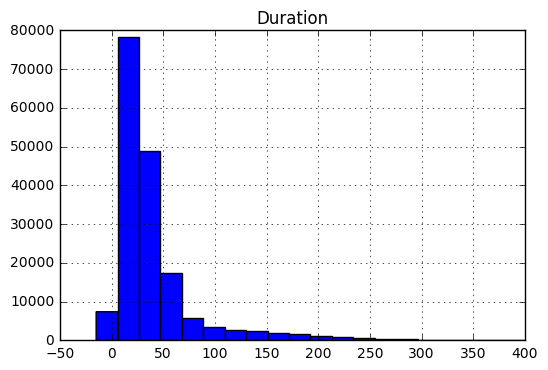

In [146]:
total_calls = len(cl._df)
print (cl._df.OutcomeCode.value_counts()/total_calls)
outcomes = cl._df.OutcomeCode.value_counts()/total_calls

print(list(outcomes.index))

print(type(('G1', 'G2', 'G3', 'G4', 'G5')))

talking_calls = cl._df[cl._df.OutcomeCode == 'TR']

talking_calls['Duration'] = (cl._df.OffsetDisconnect - cl._df.OffsetConnect) / 1000

talking_calls = talking_calls[talking_calls['Duration'] < 400]

talking_calls.hist('Duration', bins=20)

print(talking_calls.Duration)

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


<bound method Figure.show of <matplotlib.figure.Figure object at 0x7fe7d797c710>>

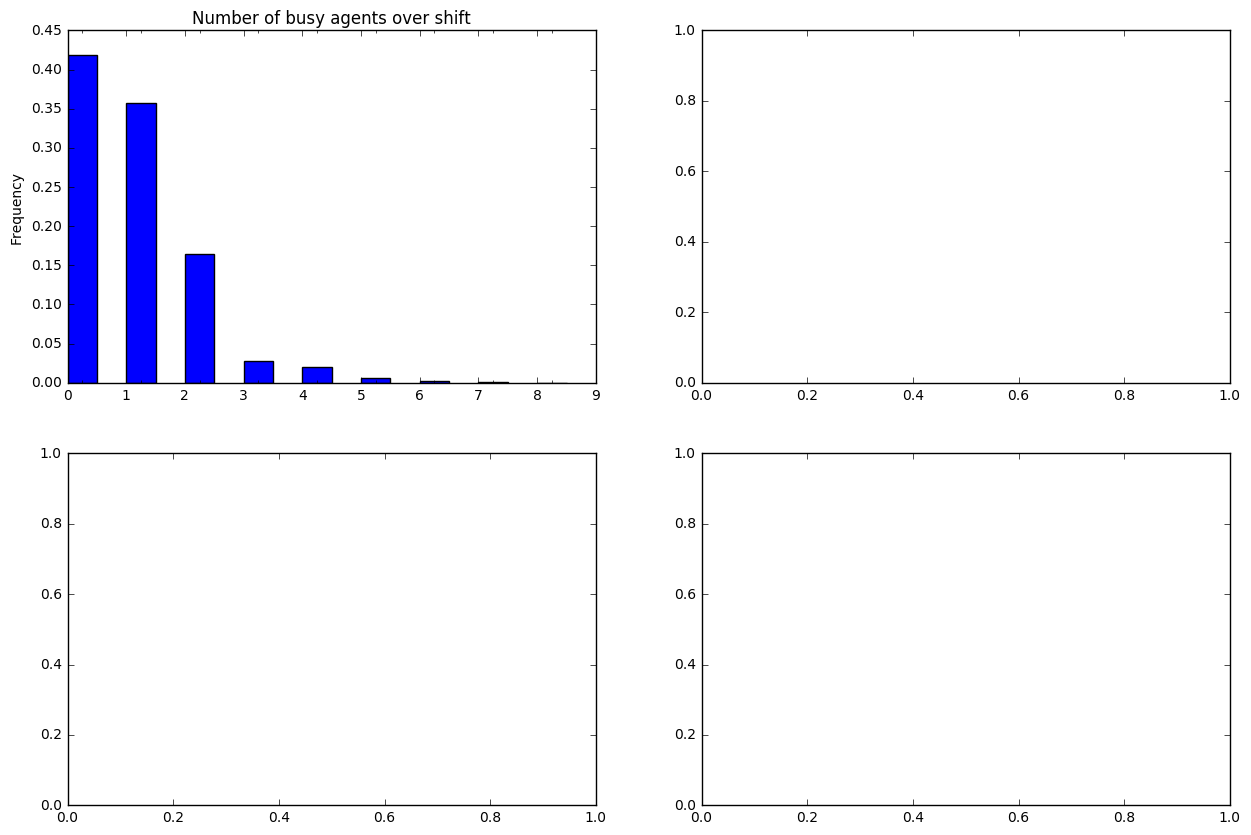

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

ind = np.arange(9)                # the x locations for the groups
width = 0.5                      # the width of the bars

axes[0,0].bar(ind,outcomes, width)
axes[0,0].set_title('Number of busy agents over shift')
axes[0,0].set_xticks(ind + width/2., ('O', 'TR', 'AM', 'E', 'NU', 'CF', 'QD', 'QT', 'AC'))
#axes[0,0].set_xlabel("Outcome")
axes[0,0].set_ylabel("Frequency")

             
fig.show

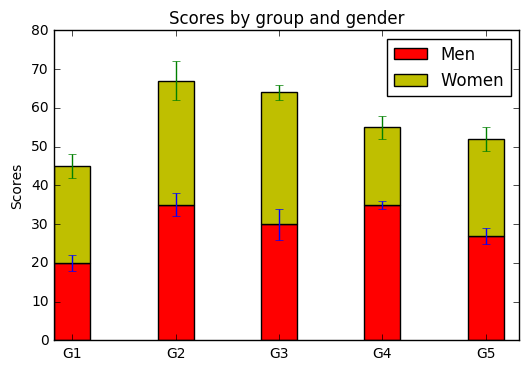

In [110]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [67]:
import pandas as pd

df_free_agent = pd.read_pickle('history_free_agent.pkl')
df_1_per_sec = pd.read_pickle('history_1_calls_sec.pkl')
df_10_per_sec = pd.read_pickle('history_10_calls_sec.pkl')

df_free_agent['current_time'] = df_free_agent['current_time'] / (1000 * 60)
df_1_per_sec['current_time'] = df_1_per_sec['current_time'] / (1000 * 60)
df_10_per_sec['current_time'] = df_10_per_sec['current_time'] / (1000 * 60)

/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


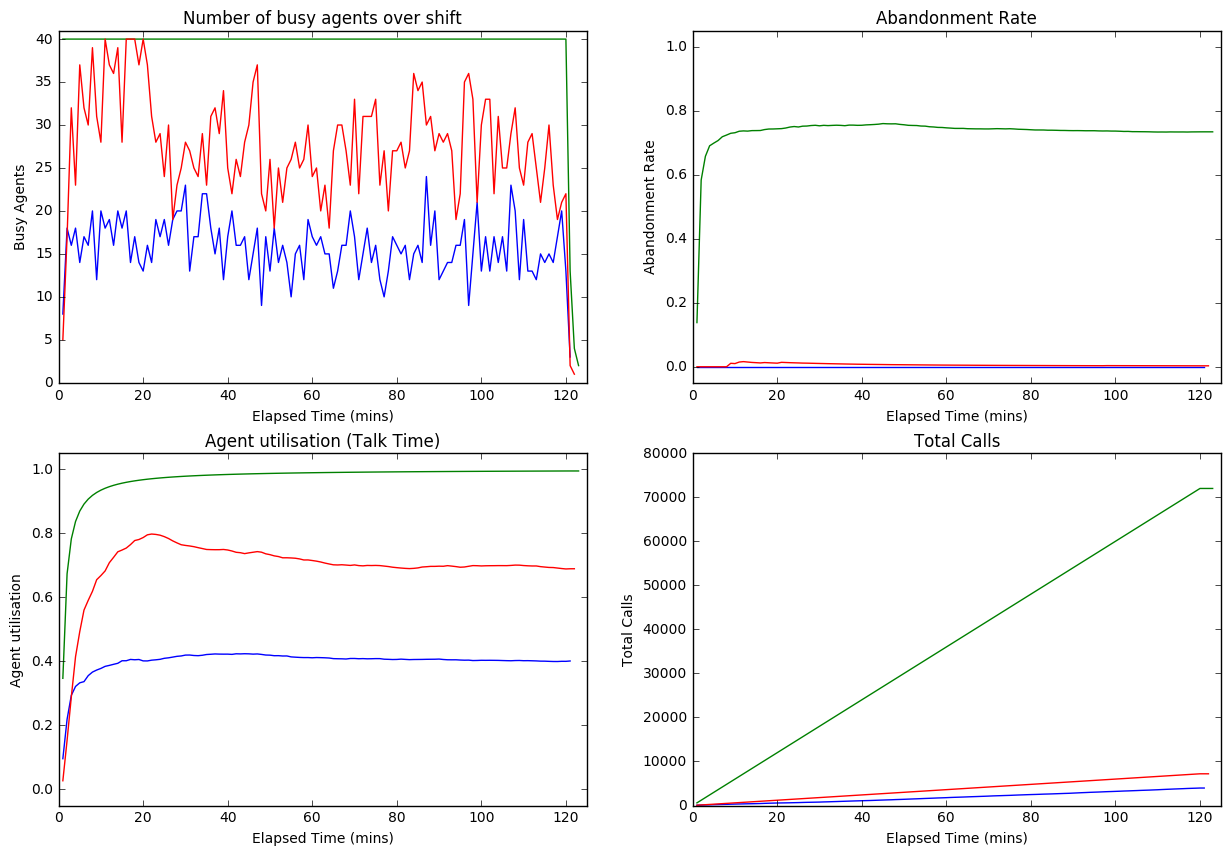

In [82]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

                          
axes[0,0].set_title('Number of busy agents over shift')
axes[0,0].set_xlabel("Elapsed Time (mins)")
axes[0,0].set_ylabel("Busy Agents")

axes[0,0].set_xlim([0, 125])
axes[0,0].set_ylim([0, 41])


axes[0,0].plot(df_free_agent.current_time, df_free_agent.number_busy_agents, lw=1, label='Free Agent')
axes[0,0].plot(df_10_per_sec.current_time, df_10_per_sec.number_busy_agents, lw=1, label='10 per sec')
axes[0,0].plot(df_1_per_sec.current_time, df_1_per_sec.number_busy_agents, lw=1, label='1 per sec')


axes[0,1].set_title('Abandonment Rate')
axes[0,1].set_xlabel("Elapsed Time (mins)")
axes[0,1].set_ylabel("Abandonment Rate")

axes[0,1].set_xlim([0, 125])
axes[0,1].set_ylim([-0.05, 1.05])


axes[0,1].plot(df_free_agent.current_time, df_free_agent.current_abandonment_rate, lw=1, label='Free Agent')
axes[0,1].plot(df_10_per_sec.current_time, df_10_per_sec.current_abandonment_rate, lw=1, label='10 per sec')
axes[0,1].plot(df_1_per_sec.current_time, df_1_per_sec.current_abandonment_rate, lw=1, label='1 per sec')


axes[1,0].set_title('Agent utilisation (Talk Time)')
axes[1,0].set_xlabel("Elapsed Time (mins)")
axes[1,0].set_ylabel("Agent utilisation")

axes[1,0].set_xlim([0, 125])
axes[1,0].set_ylim([-0.05, 1.05])


axes[1,0].plot(df_free_agent.current_time, df_free_agent.current_talk_time, lw=1, label='Free Agent')
axes[1,0].plot(df_10_per_sec.current_time, df_10_per_sec.current_talk_time, lw=1, label='10 per sec')
axes[1,0].plot(df_1_per_sec.current_time, df_1_per_sec.current_talk_time, lw=1, label='1 per sec')


axes[1,1].set_title('Total Calls')
axes[1,1].set_xlabel("Elapsed Time (mins)")
axes[1,1].set_ylabel("Total Calls")

axes[1,1].set_xlim([0, 125])
#axes[1,1].set_ylim([-0.05, 1.05])


axes[1,1].plot(df_free_agent.current_time, df_free_agent.total_number_calls, lw=1, label='Free Agent')
axes[1,1].plot(df_10_per_sec.current_time, df_10_per_sec.total_number_calls, lw=1, label='10 per sec')
axes[1,1].plot(df_1_per_sec.current_time, df_1_per_sec.total_number_calls, lw=1, label='1 per sec')


# fig.subplots_adjust(hspace=0)

fig.show()

         number_talking_calls  number_ringing_calls  \
60000                       8                    30   
120000                     18                    21   
180000                     16                    24   
240000                     18                    19   
300000                     14                    26   
360000                     17                    21   
420000                     16                    20   
480000                     20                    19   
540000                     12                    27   
600000                     20                    19   
660000                     18                    22   
720000                     19                    20   
780000                     16                    22   
840000                     20                    19   
900000                     18                    22   
960000                     20                    20   
1020000                    14                    26   
1080000   